In [1]:
% matplotlib inline

import time
import pandas as pd

from IPython import display as d

import seaborn as sns
sns.set()

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from imblearn.over_sampling import SMOTE

from libs import container
from libs.experiment import (
    WithAnotherExperiment, KFoldExperiment, roc, 
    discretize_classes, clean_features)

In [2]:
data = container.Container(sample=pd.read_pickle("data/sample.pkl"))
data["balanced"] = pd.concat((
    data.sample[data.sample.nbg == 1].sample(786),
    data.sample[data.sample.nbg == 0]))
data["small_sample"] = pd.read_pickle("data/small_sample.pkl")

## Features cleaning

In [3]:
sclasses = {
    "nbg": 1,
    "no-nbg": 0}
sclasses

{'nbg': 1, 'no-nbg': 0}

In [4]:
data.sample.shape, data.balanced.shape, data.small_sample.shape

((12598, 161), (1572, 161), (4352, 161))

In [5]:
X_columns = clean_features(data, "sample")
X_columns = X_columns[
    ~(X_columns.str.contains("Freq2_") | X_columns.str.contains("Freq3_") | X_columns.str.contains("_cnt"))]
print("Total features:", X_columns.size)

Removing [] because null
Removing ['src1_Freq1_harmonics_rel_phase_0', 'src1_Freq2_harmonics_rel_phase_0', 'src1_Freq3_harmonics_rel_phase_0', 'src2_Freq1_harmonics_rel_phase_0', 'src2_Freq2_harmonics_rel_phase_0', 'src2_Freq3_harmonics_rel_phase_0'] because lowvariance
('Total features:', 112)


In [6]:
set(x.split("_", 1)[-1] for x in X_columns)

{'Amplitude',
 'AmplitudeH',
 'AmplitudeJ',
 'AmplitudeJH',
 'AmplitudeJK',
 'Autocor_length',
 'Beyond1Std',
 'CAR_mean',
 'CAR_sigma',
 'CAR_tau',
 'Con',
 'Eta_e',
 'FluxPercentileRatioMid20',
 'FluxPercentileRatioMid35',
 'FluxPercentileRatioMid50',
 'FluxPercentileRatioMid65',
 'FluxPercentileRatioMid80',
 'Freq1_harmonics_amplitude_0',
 'Freq1_harmonics_amplitude_1',
 'Freq1_harmonics_amplitude_2',
 'Freq1_harmonics_amplitude_3',
 'Freq1_harmonics_rel_phase_1',
 'Freq1_harmonics_rel_phase_2',
 'Freq1_harmonics_rel_phase_3',
 'Gskew',
 'LinearTrend',
 'MaxSlope',
 'Mean',
 'Meanvariance',
 'MedianAbsDev',
 'MedianBRP',
 'PairSlopeTrend',
 'PercentAmplitude',
 'PercentDifferenceFluxPercentile',
 'PeriodLS',
 'Period_fit',
 'Psi_CS',
 'Psi_eta',
 'Q31',
 'Rcs',
 'Skew',
 'SmallKurtosis',
 'Std',
 'c89_c3',
 'c89_hk_color',
 'c89_jh_color',
 'c89_jk_color',
 'c89_m2',
 'c89_m4',
 'n09_c3',
 'n09_hk_color',
 'n09_jh_color',
 'n09_jk_color',
 'n09_m2',
 'n09_m4',
 'ppmb'}

## SVM - Linear

In [7]:
%%time
svc_linear = KFoldExperiment(
    clf=SVC(kernel='linear', probability=True), clsnum=sclasses,
    data=data, pcls="nbg", ncls="no-nbg", sampler=SMOTE(),
    X_columns=X_columns, y_column="nbg")("small_sample", nfolds=10)

[JP3yeS2UZiuLNLapsCni7f-2018-10-16 16:55:35.698041] Launching
[MhCEVZBqH7yv5ZKSguNUsF-2018-10-16 16:55:35.849173] Launching
[cKSkJqjTm9vFFPwXjduuu8-2018-10-16 16:55:35.999297] Launching
[VPR7TUbaPLo4tQQvXbQQvh-2018-10-16 16:55:36.156274] Launching
[kxPpfMZKVgM38ZFNsskomX-2018-10-16 16:55:36.308743] Launching
[sqNY6Tx5kiRwZZUA3DVYe4-2018-10-16 16:55:36.467535] Launching
[TwaYeNXBqFr3sMWMEVbiER-2018-10-16 16:55:36.628597] Launching
[6Si3Myi3HDFXNZmzinnWdB-2018-10-16 16:55:36.788934] Launching
[SF8o4hciV3YZmuvMGUrhzc-2018-10-16 16:55:36.983638] Launching
[RmYKbLfPUAxv6do4reyNPg-2018-10-16 16:55:37.206612] Launching
[6Si3Myi3HDFXNZmzinnWdB-2018-10-16 16:59:07.916928] Done
[RmYKbLfPUAxv6do4reyNPg-2018-10-16 16:59:44.377601] Done
[kxPpfMZKVgM38ZFNsskomX-2018-10-16 16:59:45.688598] Done
[SF8o4hciV3YZmuvMGUrhzc-2018-10-16 16:59:51.358656] Done
[sqNY6Tx5kiRwZZUA3DVYe4-2018-10-16 17:00:24.842910] Done
[JP3yeS2UZiuLNLapsCni7f-2018-10-16 17:00:25.931719] Done
[cKSkJqjTm9vFFPwXjduuu8-2018-10-16 17:

## SVM - Poly

In [8]:
%%time
svc_poly = KFoldExperiment(
    clf=SVC(kernel='poly', probability=True), clsnum=sclasses,
    data=data, pcls="nbg", ncls="no-nbg", sampler=SMOTE(),
    X_columns=X_columns, y_column="nbg")("small_sample", nfolds=10)

[vrsqeUzUEAck4g2ouTr3TC-2018-10-16 17:00:38.527959] Launching
[yZGRX5DRUqCS55xw5p3NUF-2018-10-16 17:00:38.728307] Launching
[x5bknur5TzWMzpnk7CgPV7-2018-10-16 17:00:38.922155] Launching
[nw86zsnTpxzhKHjFmqL2aX-2018-10-16 17:00:39.124402] Launching
[3jbWViXJGTVfnMX7GoqEg7-2018-10-16 17:00:39.333998] Launching
[Jy3i5kVVt3cStm5MBfg5vE-2018-10-16 17:00:39.544242] Launching
[439b9rZZXRNoSKSmTBFRSL-2018-10-16 17:00:39.774101] Launching
[f4QBGeZ8AXEgcFF8A4hidS-2018-10-16 17:00:39.978990] Launching
[w9auVht2vxWuUUk5E86ZxN-2018-10-16 17:00:40.228598] Launching
[bDTjSjohkR7LYkBC63dcYn-2018-10-16 17:00:40.430929] Launching
[bDTjSjohkR7LYkBC63dcYn-2018-10-16 17:02:18.773516] Done
[w9auVht2vxWuUUk5E86ZxN-2018-10-16 17:02:20.841810] Done
[f4QBGeZ8AXEgcFF8A4hidS-2018-10-16 17:02:29.674085] Done
[439b9rZZXRNoSKSmTBFRSL-2018-10-16 17:02:37.809674] Done
[vrsqeUzUEAck4g2ouTr3TC-2018-10-16 17:03:05.914332] Done
[3jbWViXJGTVfnMX7GoqEg7-2018-10-16 17:03:30.075753] Done
[x5bknur5TzWMzpnk7CgPV7-2018-10-16 17:

## Random Forest

In [9]:
%%time
rf = KFoldExperiment(
    clf=RandomForestClassifier(n_estimators=500, criterion="entropy"), clsnum=sclasses, sampler=SMOTE(),
    data=data, pcls="nbg", ncls="no-nbg", X_columns=X_columns, y_column="nbg")("small_sample", nfolds=10)

[VdjDcCs7HNk4NZgQpbZQMU-2018-10-16 17:03:43.128921] Launching
[YwYDBDhvWhSQLaD2UrYZUV-2018-10-16 17:03:43.283581] Launching
[Vc4b7mD3j5djeWsfZBasbH-2018-10-16 17:03:43.445874] Launching
[gLu7439sFvgyYjQdqYwwkh-2018-10-16 17:03:43.607709] Launching
[vdvseKUCC5zSVD8mfznDn7-2018-10-16 17:03:43.769631] Launching
[YjExekXQd7zPx3dbnpwdLh-2018-10-16 17:03:43.927019] Launching
[P8M6MJr8nABzeBLMqrhTYC-2018-10-16 17:03:44.090973] Launching
[eG8VrnvrjfFHnPaGsCiJ5m-2018-10-16 17:03:44.244665] Launching
[m7SsCVkAgXwaqsdLa8DFi5-2018-10-16 17:03:44.407105] Launching
[D2DVPUxL6jP8PCRPygWKLB-2018-10-16 17:03:44.567797] Launching
[D2DVPUxL6jP8PCRPygWKLB-2018-10-16 17:05:57.228919] Done
[m7SsCVkAgXwaqsdLa8DFi5-2018-10-16 17:06:00.086010] Done
[eG8VrnvrjfFHnPaGsCiJ5m-2018-10-16 17:06:03.411354] Done
[YwYDBDhvWhSQLaD2UrYZUV-2018-10-16 17:06:04.502530] Done
[VdjDcCs7HNk4NZgQpbZQMU-2018-10-16 17:06:07.425569] Done
[gLu7439sFvgyYjQdqYwwkh-2018-10-16 17:06:07.519335] Done
[Vc4b7mD3j5djeWsfZBasbH-2018-10-16 17:

## KNN

In [10]:
%%time
knn = KFoldExperiment(
    clf=KNeighborsClassifier(n_neighbors=50, weights='distance'), clsnum=sclasses, sampler=SMOTE(),
    data=data, pcls="nbg", ncls="no-nbg", X_columns=X_columns, y_column="nbg")("small_sample", nfolds=10)

[rZ2wiqskwzZVjnGNZ8hZmY-2018-10-16 17:06:12.013828] Launching
[R3psiTJDUSkkK8NPGx35P8-2018-10-16 17:06:12.196507] Launching
[kU5QNZChbtxkofTdEcX5hP-2018-10-16 17:06:12.371270] Launching
[tAGZM9ydvbeMYxsQZesqZU-2018-10-16 17:06:12.569934] Launching
[9FG2m2ZmURM7i3nkHmNA6W-2018-10-16 17:06:12.763251] Launching
[uZPvW3u47EBEfartdymsnX-2018-10-16 17:06:12.974589] Launching
[Uj6DW5cgakccGG6Gg5c2hE-2018-10-16 17:06:13.319058] Launching
[2Q2fA8LWGzYcFwNdXehxTM-2018-10-16 17:06:13.576928] Launching
[XAhCd8bPfgaBydMfJbGs52-2018-10-16 17:06:13.934432] Launching
[asH6GUbMChhzHnPNxFnaeB-2018-10-16 17:06:14.236803] Launching
[rZ2wiqskwzZVjnGNZ8hZmY-2018-10-16 17:06:16.634483] Done
[Uj6DW5cgakccGG6Gg5c2hE-2018-10-16 17:06:17.869013] Done
[2Q2fA8LWGzYcFwNdXehxTM-2018-10-16 17:06:18.114968] Done
[XAhCd8bPfgaBydMfJbGs52-2018-10-16 17:06:18.281536] Done
[asH6GUbMChhzHnPNxFnaeB-2018-10-16 17:06:18.445894] Done
[kU5QNZChbtxkofTdEcX5hP-2018-10-16 17:06:21.111460] Done
[uZPvW3u47EBEfartdymsnX-2018-10-16 17:

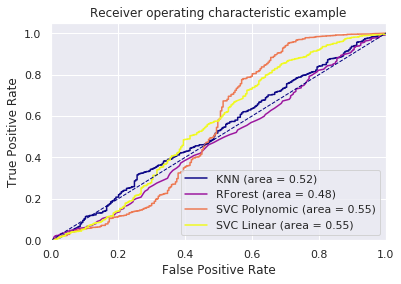

In [11]:
roc({"KNN": knn, "RForest": rf, 
     "SVC Linear": svc_linear,
     "SVC Polynomic": svc_poly})